# Case Study 2

### imports

In [46]:
import netsim.netgen as ng
import netsim.netsim as ns
import netsim.utils as utils
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio as ro

### Reading files

#### *Read DEM*

In [25]:
fn = r'..\data\case_study\DEM4.tif'

In [26]:
dem, profile = utils.read_raster(fn)

In [27]:
#find the cellsize of the dem
cellsize = profile['transform'].a

##### *Read shapefile into a geopandas dataframe*

In [28]:
# change 5 or 15
fn = r'..\data\case_study\IA_Sites.shp'

##### read and make a copy of original dataframe

In [29]:
df_temp = gpd.read_file(fn)

# make a copy
df = df_temp.copy(deep=True)
df

,Name,Seq,Group,Type,Northing,Easting,Chronology,Descriptio,geometry
0,Sa Taula des Moro,1,1,R,4386758.00,529457.00,Undet,Cyclopean Walls,POINT (529457 4386758)
1,Plat - Puig Son Sard,1,1,R,4388030.00,531670.00,Undet,Cyclopean Walls,POINT (531670 4388030)
2,Pula - Cases,1,3,H,4388760.00,532380.00,Iron Age,Cyclopean Walls,POINT (532380 4388760)
3,Cova d'en Bou,1,2,R,4386570.00,530820.00,Undet,Artificial Cave,POINT (530820 4386570)
4,Cova calenta,1,2,R,4385300.00,530410.00,Undet,Cave,POINT (530410 4385300)
5,Pula - Talaiots,1,3,H,4388428.18,532496.82,Iron Age,"Tower, Cyclopean Walls (UTM @ CIM: 4388630 532...",POINT (532496.8199999999 4388428.18)
6,Rumies,1,3,H,4387734.14,532661.23,Iron Age,Tower,POINT (532661.23 4387734.14)
7,Cova - Rafal Baix,1,2,R,4390786.00,531488.00,Iron Age,"(UTM @ CIM: 4390970, 531600). Natural Cave wit...",POINT (531488 4390786)
8,Son Lluc,1,3,H,4386469.00,532280.00,Iron Age,Tower. Presence of surface pottery. (UTM @ CIM...,POINT (532280 4386469)
9,Corralassos,1,3,H,4385846.00,533082.00,Iron Age,Talaiotic village. Pottery,POINT (533082 4385846)


In [30]:
# check values
df = ng.setup(df)


 No corrections or errors !! 


### Preliminaries

#### *Convert point coordinates into rows and column and add to dataframe*

In [31]:
df['r'], df['c'] = utils.pt2rc(df['geometry'], profile)
df

,name,seq,group,type,northing,easting,chronology,descriptio,geometry,id,r,c
0,Sa Taula des Moro,1,1,R,4386758.00,529457.00,Undet,Cyclopean Walls,POINT (529457 4386758),0,855,38
1,Plat - Puig Son Sard,1,1,R,4388030.00,531670.00,Undet,Cyclopean Walls,POINT (531670 4388030),1,600,481
2,Pula - Cases,1,3,H,4388760.00,532380.00,Iron Age,Cyclopean Walls,POINT (532380 4388760),2,454,623
3,Cova d'en Bou,1,2,R,4386570.00,530820.00,Undet,Artificial Cave,POINT (530820 4386570),3,892,311
4,Cova calenta,1,2,R,4385300.00,530410.00,Undet,Cave,POINT (530410 4385300),4,1146,229
5,Pula - Talaiots,1,3,H,4388428.18,532496.82,Iron Age,"Tower, Cyclopean Walls (UTM @ CIM: 4388630 532...",POINT (532496.8199999999 4388428.18),5,520,646
6,Rumies,1,3,H,4387734.14,532661.23,Iron Age,Tower,POINT (532661.23 4387734.14),6,659,679
7,Cova - Rafal Baix,1,2,R,4390786.00,531488.00,Iron Age,"(UTM @ CIM: 4390970, 531600). Natural Cave wit...",POINT (531488 4390786),7,49,444
8,Son Lluc,1,3,H,4386469.00,532280.00,Iron Age,Tower. Presence of surface pottery. (UTM @ CIM...,POINT (532280 4386469),8,912,603
9,Corralassos,1,3,H,4385846.00,533082.00,Iron Age,Talaiotic village. Pottery,POINT (533082 4385846),9,1037,763


#### *Plot locations*

In [32]:
hillshade = utils.calculate_hillshade(dem)

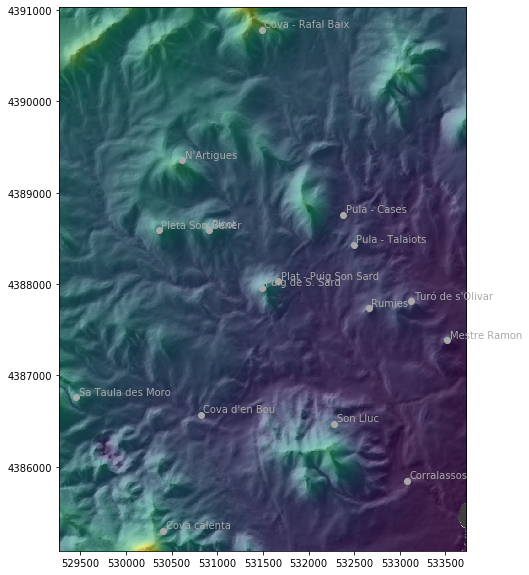

In [33]:
utils.plot_map({'ras':dem, 'profile':profile, 'bground':hillshade}, loc={'df':df, 'label':'name'},
               cmap='viridis', figsize=(10,10))

### create network generator

In [34]:
# create network generator
netgentor, net_info, total_iterations = ng.create_network_generator(df)


 iteration broken per group....

   group  num_loc  num_iter    iter_type
0      1        4        24  permutation
1      2        4        24  permutation
2      3        8       100       sample

 total number of iterations.... 57600


### Setup Simulation

##### *find coefficients for gradient to cost function*

In [35]:
# vertical factor table
vftfn = r'..\data\iwdt\grad2cost.csv'

# read file slope (tan) to cost
vft = np.genfromtxt(vftfn, delimiter=',')

In [36]:
# fit values to 4th degree polynomial and return coefficients
coef = np.polyfit(np.tan(np.radians(vft[: , 0])), vft[:,1], deg=4)
coef

array([ 14.58472386, -20.89105302,  41.30992529,  16.89952776,
         2.57058679])

##### Set up cost dictionary

In [37]:
cost_dict={
    'dem': dem,
    'netcost': np.zeros_like(dem),
    'cellsize': cellsize,
    'weight': 0.3,
    'coef': coef
}

##### Set up netsim dictionary

##### *calculate decay factor $\alpha$ for given $d_0$ and $NC_0$*

We shall specify that at a distance of $d_0$=10m the network cost (i.e. the effect of the existing network) will decrease to $\frac{1}{2} $.  

In [38]:
from math import log

d0 = 20 # distance @ which 
NC0 = 0.5  # cost reduces to 50%
alpha = d0 / log(1- NC0)

In [39]:
netsim_dict= {
    'i': 1.0,      # path impact
    'Gmax': 5.0,   # path saturation
    'T': 10,       # residuality 
    'alpha': alpha # decay factor 
    }

#### Run *nsim* simulations

In [40]:
progress = lambda i, n=10: print (i//n, end = "") if i % n == 0 else print('.', end = "")

In [41]:
# number of iterations 
nsim = 1

##### initialize variables

In [42]:
all_path_lst = []
all_paths = np.zeros_like(dem, dtype=np.float64)
prev_id = 0

##### run simulations

In [43]:
for isim in range(nsim):
    
    # progress
    progress(isim)
    
    # generate network iteration
    net_iteration = list(next(netgentor))
    
    # create path network layout for current iteration
    df_net = ng.network_layout(df, net_iteration, isim, opt='decentral')
    
    # simulate network
    _, paths, path_lst = ns.simulation(df, df_net, cost_dict, netsim_dict)
    
    # add current iteration path list to that of previous iterations 
    for pth in path_lst:
        pth['id'] += len(all_path_lst)
    all_path_lst += path_lst
    
    # add current path network to path networks from previous iterations
    all_paths += paths

0

##### Save results?

In [44]:
save_flag = True
save_fn =  './all_paths'

In [47]:
# generate dataframe output
df_paths = pd.DataFrame(all_path_lst, columns=['id', 'origin','destination', 'track'])    

# save?
if save_flag:
    df_paths.to_pickle(save_fn)
    with ro.open( save_fn+'.tif', 'w', **profile) as ras:
        ras.write(all_paths, 1)

##### Plot results

In [ ]:
utils.plot_map({'ras':dem, 'profile':profile, 'paths':all_paths}, loc={'df':df, 'label':'name'}, cmap='magma',
               figsize=(20,12), title='habitation')

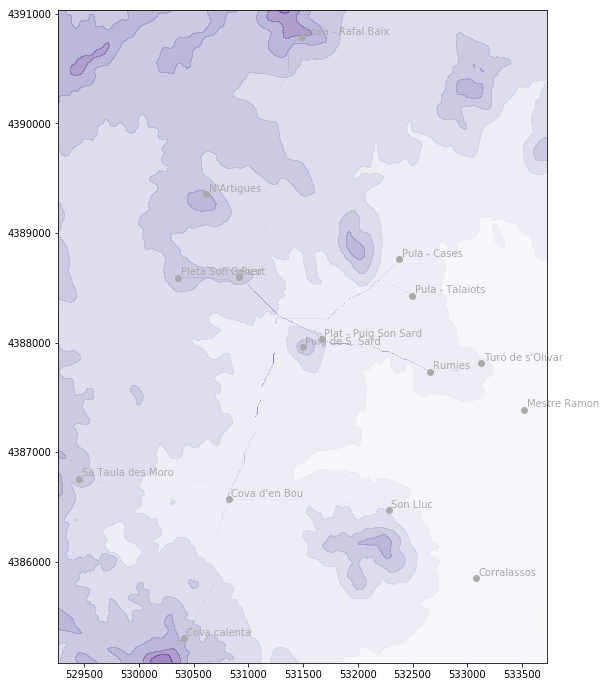

In [56]:
utils.plot_map({'ras':dem, 'meta':meta, 'paths':paths}, loc={'df':df, 'label':'name'}, cmap='magma',
               figsize=(20,12), save='eraseme')